# **Israel Elections Data Analysis - Lab 1:**


**Daniel Ohayon - ID: 315453027**

**Olga Moroz - ID: 324756568** 

In [10]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import os
import io
from matplotlib import pyplot as plt
import copy
%matplotlib inline 


Mounting our local drive to the colab network:

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading elections 2020 elections data:


In [12]:
from google.colab import files
uploaded = files.upload()

Saving votes per city 2020.csv to votes per city 2020 (1).csv


In [13]:
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col=['שם ישוב']).sort_index()
# Dataset is now stored in a Pandas Dataframe
df_2020_raw.head()

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,967,2018,595,6,589,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2,NaN
אבו גוש,2,472,4821,2718,36,2682,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14,NaN
אבו סנאן,6,473,9422,6090,53,6037,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247,NaN
אבו עבדון שבט,18,958,142,41,1,40,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
אבו קורינאת שבט,18,968,3037,1336,8,1328,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0,NaN


In [14]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns

# **Q.1**

**A. Find the "פסולים" , "כלל המצביעים" columns:**


In [15]:
psulim = df_2020_raw['פסולים'] # עמודת קולות פסולים
klal_matzbiim = df_2020_raw['מצביעים'] # עמודת כלל מצביעים
p_psulim = (psulim/klal_matzbiim)*100
df_2020_raw['אחוז הפסולים'] = (psulim/klal_matzbiim)*100 # עמודת אחוז קולות פסולים

**B. Histogram for the percentage of invalid votes for all the cities:**

Text(0, 0.5, 'Density')

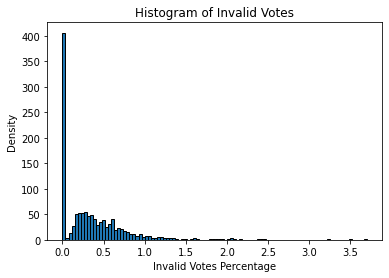

In [16]:
fig = plt.hist(df_2020_raw['אחוז הפסולים'], bins=100, range=(0, max(p_psulim)), edgecolor = 'black')
plt.title('Histogram of Invalid Votes')
plt.xlabel('Invalid Votes Percentage')
plt.ylabel('Density')

In [17]:
cities_3 = pd.DataFrame(df_2020_raw.sort_values(['אחוז הפסולים'],ascending=False)['אחוז הפסולים'].head(3))

**The three cities with the highest percentage of invalid votes are :**

In [18]:
display(cities_3)

,אחוז הפסולים
שם ישוב,
מאיר שפיה,3.703704
עין ראפה,3.485255
כדיתה,3.225806


# **Q.2**

**A function for showing a bar plot of the voting percentage in a given city, while showing only the parties above a 3.25% threshold :**

Text(0, 0.5, 'Voting Percentage')

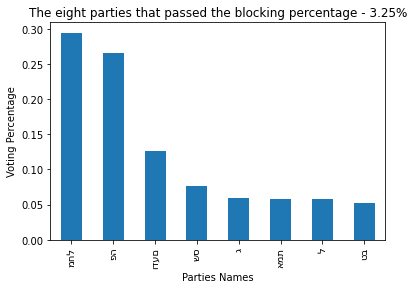

In [19]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2020, 0.0325)  # total votes for each party
total_votes.plot.bar()
plt.title("The eight parties that passed the blocking percentage - 3.25%")
plt.xlabel('Parties Names')
plt.ylabel('Voting Percentage')


**A function the create two bar plots at the same image for comparing 2 cities- only showing values above a certain threshold:**

In [20]:
def party_bar(df, thresh, city1, city2):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()


    city1_votes = df.loc[city1, names] / df.loc[city1, names].sum()
    city2_votes = df.loc[city2, names] / df.loc[city2, names].sum()
    city1_bar = ax.bar(np.arange(n), list(city1_votes), width, color='r')
    city2_bar = ax.bar(np.arange(n) + width, list(city2_votes), width, color='b')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2020 : ' +city1[::-1]+ ' - ' +city2[::-1] )
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((city1_bar[0], city2_bar[0]), (city1[::-1], city2[::-1]))
    plt.show()

    return fig, ax


**Finding 3 pairs of cities that had more than 50,000 votes:**

In [21]:
print(((df_2020_raw.loc[df_2020_raw['מצביעים']>50000]).sort_values(['מצביעים'],ascending=False))['מצביעים']) # show the relevant cities for comparing

שם ישוב
מעטפות חיצוניות    330209
תל אביב  יפו       268116
ירושלים            263214
חיפה               145488
ראשון לציון        138490
פתח תקווה          132135
אשדוד              118313
נתניה              110399
חולון              101584
באר שבע            100051
רמת גן              87752
בני ברק             85775
רחובות              74296
אשקלון              72538
בת ים               65107
כפר סבא             58330
הרצליה              55010
Name: מצביעים, dtype: int64


**Tel - Aviv Vs. Jerusalem :**

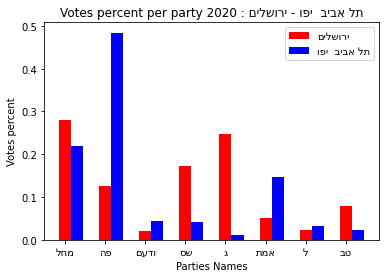

In [22]:
fig, ax = party_bar(df_2020, 0.0325, 'ירושלים', 'תל אביב  יפו')

**Bnei- Brak Vs. Be'er Sheva:**

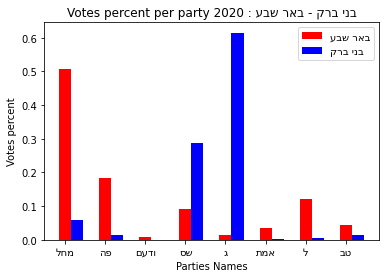

In [23]:
fig, ax = party_bar(df_2020, 0.0325, 'באר שבע', 'בני ברק')

**Haifa Vs. Ashkelon :**

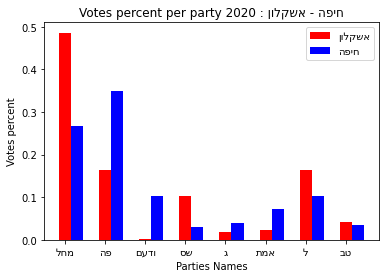

In [24]:
fig, ax = party_bar(df_2020, 0.0325, 'אשקלון', 'חיפה')

It can be seen in the comparison between Tel Aviv and Jerusalem that in Jerusalem where the percentage of religious people is very high, the religious parties ג ,שס received a high percentage of votes. When in secular Tel Aviv the percentage of votes for these parties is almost zero.

This comparison is also relevant to Be'er Sheva and Bnei Brak. Let us note the similarities between Bnei Brak and Jerusalem and between Tel Aviv and Beer Sheva. These cities behave very similarly in the percentage of votes cast for the ג,שס parties, and so the difference in the percentage of religious ones is similar.

When comparing Haifa and Ashkelon, one can actually see great similarities in the percentages of votes for most parties, with the main difference being between the ultra-Orthodox and Arab parties. In other words, the share that the ultra-Orthodox parties in Ashkelon receive is relatively similar to the share that the Arab parties receive in Haifa.

# **Q.3**

**Summarize of the total votes for the whole country :**

In [25]:
df_2020_sort = df_2020_raw.drop(columns = ['סמל ועדה','סמל ישוב','בזב','פסולים','מצביעים','אחוז הפסולים']) # drop irrelevant columns
df_2020_sort.loc['כלל ארצי']= df_2020_sort.sum(numeric_only=True, axis=0)    # append a row for total votes 


**A function that calculate vote percentage of each city:**

In [26]:
def percent_df(df):
    new_df = copy.deepcopy(df)
    new_df.iloc[:,1:-1] = new_df.values[:,1:-1]/new_df.values[:,0,None]
    return new_df

df_per_city = percent_df(df_2020_sort) # apply on our data

**A function that calculates the minimum difference between city results and the country results:**

In [27]:
def calc_diff(df):
    df = df.drop(columns = ['כשרים']) # drop irrelevant column
    i = 0
    lst = []
    for city in df.index.values:            # itterate on each city
        i = ((df.loc[city]-df.loc['כלל ארצי'])**2).sum()
        lst.append(i)                       
    df['Diff'] = lst 
    return df

df_per_diff = calc_diff(df_per_city) # apply on our data
(pd.DataFrame(df_per_diff.sort_values(['Diff'],ascending=True)['Diff']).head(10)) # checking the results

,Diff
שם ישוב,
כלל ארצי,0.000000
מעטפות חיצוניות,0.009138
חיפה,0.013144
ירכא,0.018226
רחובות,0.021555
פתח תקווה,0.023130
ורדון,0.026633
צרופה,0.027637
כסראסמיע,0.030050


**drop the rows of the 'כלל ארצי' and 'מעטפות חיצוניות' to get only the cities data for easier copmarison:**

*('כלל ארצי' and 'מעטפות חיצוניות' are not cities)*

In [28]:
city_no_country = df_per_diff.drop(['כלל ארצי','מעטפות חיצוניות'])

*Note: We chose to show in the following histograms only the parties that passed the blocking percentage because they are the most representative and relevant parties, rather than produce a plot with all the parties and that would not be informative.*

**A. Find the city with the minimum difference:**




In [29]:
(city_no_country.sort_values(['Diff'],ascending=True).head(1))['Diff'] # the city with the minimum difference = 'חיפה'

שם ישוב
חיפה    0.013144
Name: Diff, dtype: float64

**create the plot of the Country results VS. The most representative city - 'חיפה' :**

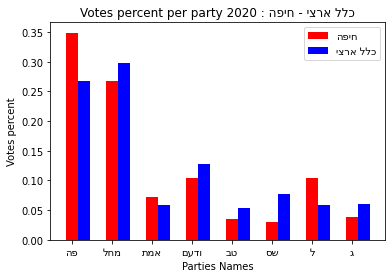

In [30]:
fig, ax = party_bar(df_per_diff.drop(columns = ['Diff']), 0.01,'חיפה', 'כלל ארצי')

**B. Find the city with the maximum difference:**

In [31]:
(city_no_country.sort_values(['Diff'],ascending=True).tail(1))['Diff'] # the city with the maximum difference = 'קוממיות'

שם ישוב
קוממיות    1.000697
Name: Diff, dtype: float64

**create the plot of the Country results VS. The least representative city - 'קוממיות' :**

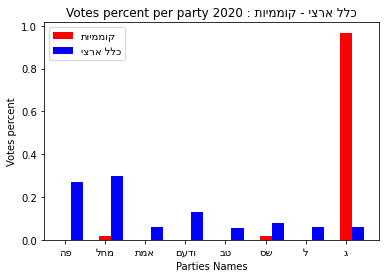

In [32]:
fig, ax = party_bar(df_per_diff.drop(columns = ['Diff']), 0.01, 'קוממיות', 'כלל ארצי')

Haifa is a very heterogeneous city in terms of its population and therefore can be expected to represent the same heterogeneity that the State of Israel represents. A great similarity can be seen in the structure of the population between Haifa and the whole state.

On the other hand, the city "קוממיות" is a city where all its residents have the same religious characteristics- all from the ultra-Orthodox-Hasidic stream, so it can be seen that the absolute majority votes are for a clear ultra-Orthodox party- 'יהדות התורה- 'ג.
As a result, this city cannot be seen as a city that represents the heterogeneity that exists in Israeli society as a whole, including the voting data.